In [39]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
%matplotlib inline

Times are measured on grid and saved in csv format.
First columns is the buffersize in bytes followed by the average of ssend/recv time. Send messages specifies how many times the ssend/recv roundtrips have been measured.

In [81]:
!head data-t40-n1000-grid.csv

buffersize;t_average;send messages
8;3.68643e-06;1000
16;4.1635e-06;1000
24;2.64752e-06;1000
40;4.71246e-06;1000
64;3.13354e-06;1000
104;4.00949e-06;1000
168;3.96705e-06;1000
272;4.26745e-06;1000
440;4.34601e-06;1000


In [25]:
df = pd.read_csv('data-t40-n100000-grid.csv', sep=';')

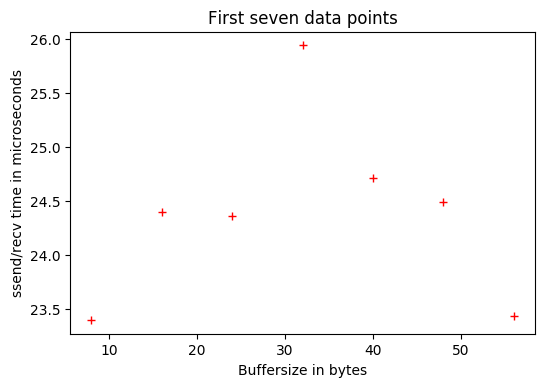

In [36]:
data_head = df[:7]
plt.figure(dpi=100)
plt.title('First seven data points')
plt.xlabel('Buffersize in bytes')
plt.ylabel('ssend/recv time in microseconds')
plt.plot(data_head.buffersize, [x * 10e6 for x in data_head.t_average], 'r+');

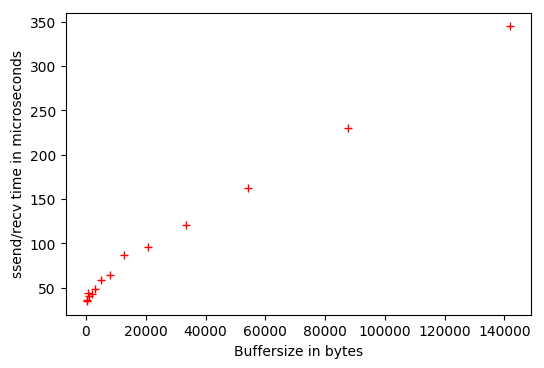

In [31]:
data_head = df[7:]
plt.figure(dpi=100)
plt.xlabel('Buffersize in bytes')
plt.ylabel('ssend/recv time in microseconds')
plt.plot(data_head.buffersize, [x * 10e6 for x in data_head.t_average], 'r+');

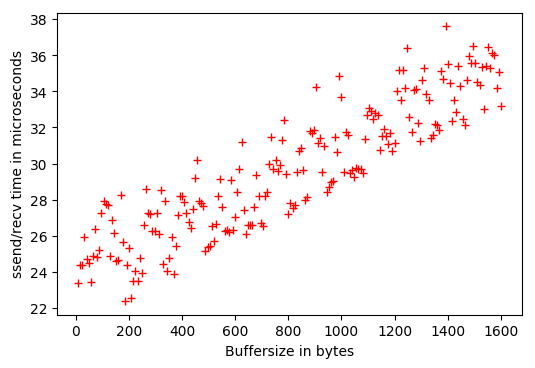

In [33]:
df = pd.read_csv('data-lin-t200-n100000.csv', sep=';')
plt.figure(dpi=100)
plt.xlabel('Buffersize in bytes')
plt.ylabel('ssend/recv time in microseconds')
plt.plot(df.buffersize, [x * 10e6 for x in df.t_average], 'r+');

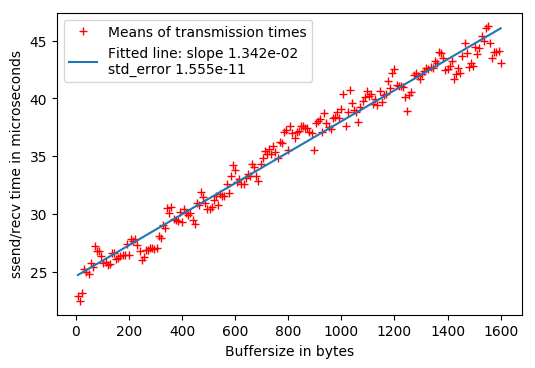

In [82]:
df = pd.read_csv('data-lin-t200-n1000000.csv', sep=';')
slope, intercept, r_value, p_value, std_err = stats.linregress(df.buffersize, df.t_average)
plt.figure(dpi=100)
plt.xlabel('Buffersize in bytes')
plt.ylabel('ssend/recv time in microseconds')
plt.plot(df.buffersize, [x * 10e6 for x in df.t_average], 'r+', label="Means of transmission times");
plt.plot(df.buffersize, (intercept+slope*df.buffersize)*10e6,
         label="Fitted line: slope {:0.3e}\nstd_error {:0.3e}".format(slope*10e6, std_err));
plt.legend();

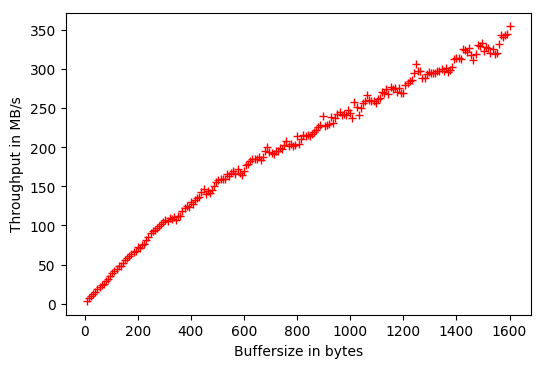

In [83]:
throughput = (df.buffersize / 1024**2) / df.t_average 
plt.figure(dpi=100)
plt.xlabel('Buffersize in bytes')
plt.ylabel('Throughput in MB/s')
plt.plot(df.buffersize, throughput, 'r+');
